# Qiskit Notebook 4 - Fault Tolerant Quantum Algorithms I - Grover's Algorithm and Quantum Fourier Transform

In this Notebook, we will learn about:

* Oracle Algorithms
* Grover's Search Algorithm
* Quantum Fourier Transform

In [1]:
# If using Google Colab, uncomment the following

#!pip install -q qiskit
#!pip install -q qiskit[visualization]
#!pip install -q qiskit-ibm-runtime
#!pip install -q qiskit-aer

One of the main selling points of Quantum Computers is the fact that they **may provide computational advantage over classical computers**. This advantage can be understood in terms of two resources: **space complexity**, which corresponds to the amount of computer memory required to solve a problem, and **time complexity**, which corresponds to amount of computer time it takes to solve a problem. Time complexity is estimated by counting the number of elementary operations performed by the algorithm.


We will concentrate ourselves in two algorithms that present an advantage in time complexity over its (known) classical counterparts: Grover's algorithm and Shor's algorithm. This algorithms fall nowadays into the set of **Fault-Tolerant Quantum Algorithms** (FTQA): algorithms that require billions of logical qubits (i.e. qubits without errors) and noiseless quantum gates and measurement operations. Although current quantum devices are faraway from being able to implement these algorithms for practical purposes, it is important to study them, as FTQA are the only algorithms that have rigorous proof of advantage over classical machines. 


While the time required to solve problems is our main concern, we will deviate slightly from this focus for the purposes of this first lesson. What we will do is to formulate a simple algorithmic framework — known as the **query model** — and explore the advantages that quantum computers offer within this framework.

The query model of computation is like a petri dish for quantum algorithmic ideas. It is rigid and unnatural, in the sense that it does not accurately represent the sorts of computational problems we generally care about in practice. Nevertheless, it has proved to be incredibly useful as a tool for developing quantum algorithmic techniques, including ones that power the most well-known quantum algorithms (such as Shor's factoring algorithm). It also happens to be a very useful framework for explaining these techniques.

To understand why the previously mentioned algorithms outperform known classical algorithms, we will have to first understand what **oracle-based algorithms** are (also known as the query model of computation).

# Oracle Algorithms

The most general way of understanding what a computer does is as follows: we provide an **input**, an algorithm computes a series of functions, and we obtain an **output**, which corresponds to the solution to our problem.

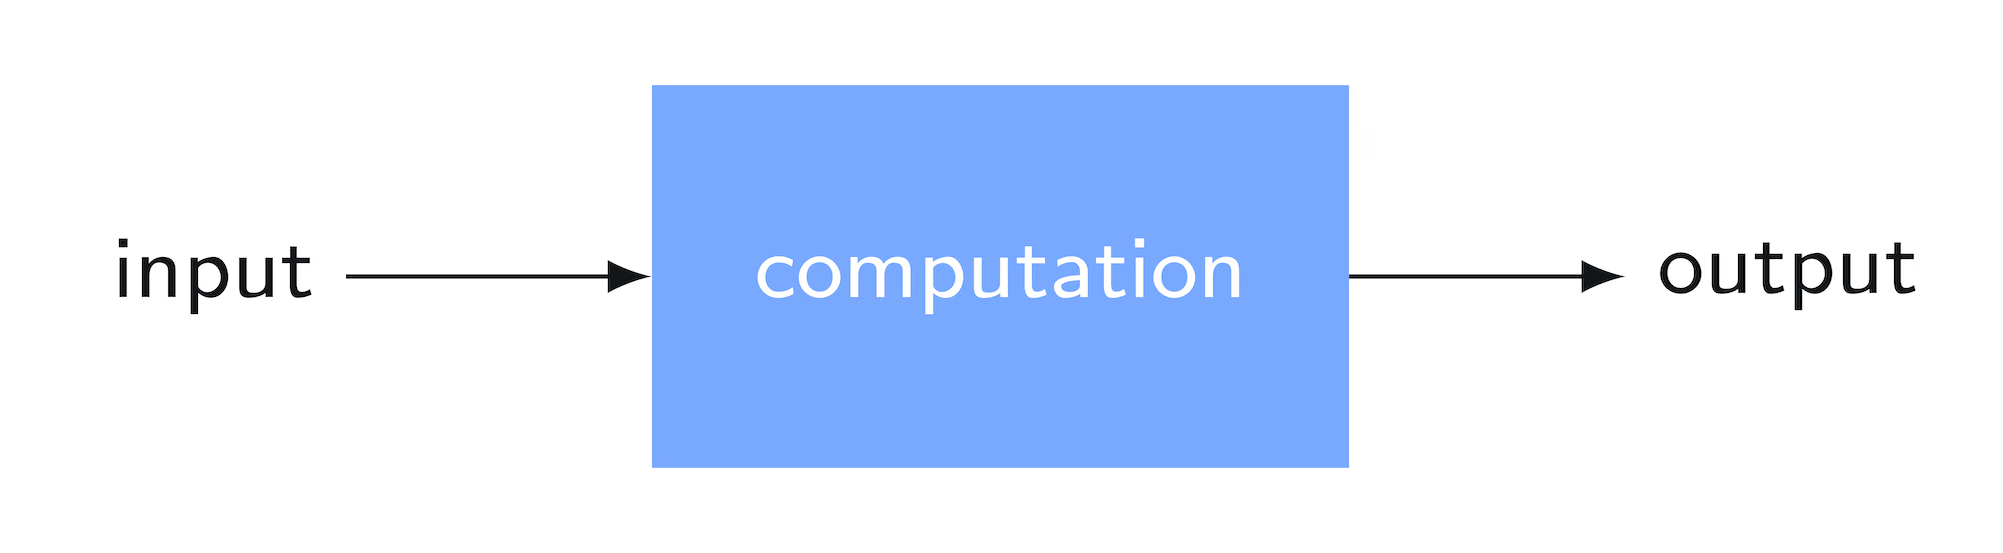

In oracle-based algorithms, the **input** corresponds to a **function**, which the algorithm access by making **queries**. In this scenario, we say that the input is being provided by an **oracle** or **black box**: the complete description of the input is hidden from the computation, with the only way to access it being to ask questions. The term black box makes sense especially when we think about the input as being represented by a function: we cannot look inside the function and understand how it works, we can only evaluate it on arguments we select.

In a general manner, we can consider as input (output) a string of $n$ ($m$) bits, and the oracle as a function of the form:

$$ f: \{ 0,1 \}^n \rightarrow \{ 0,1 \}^m.$$

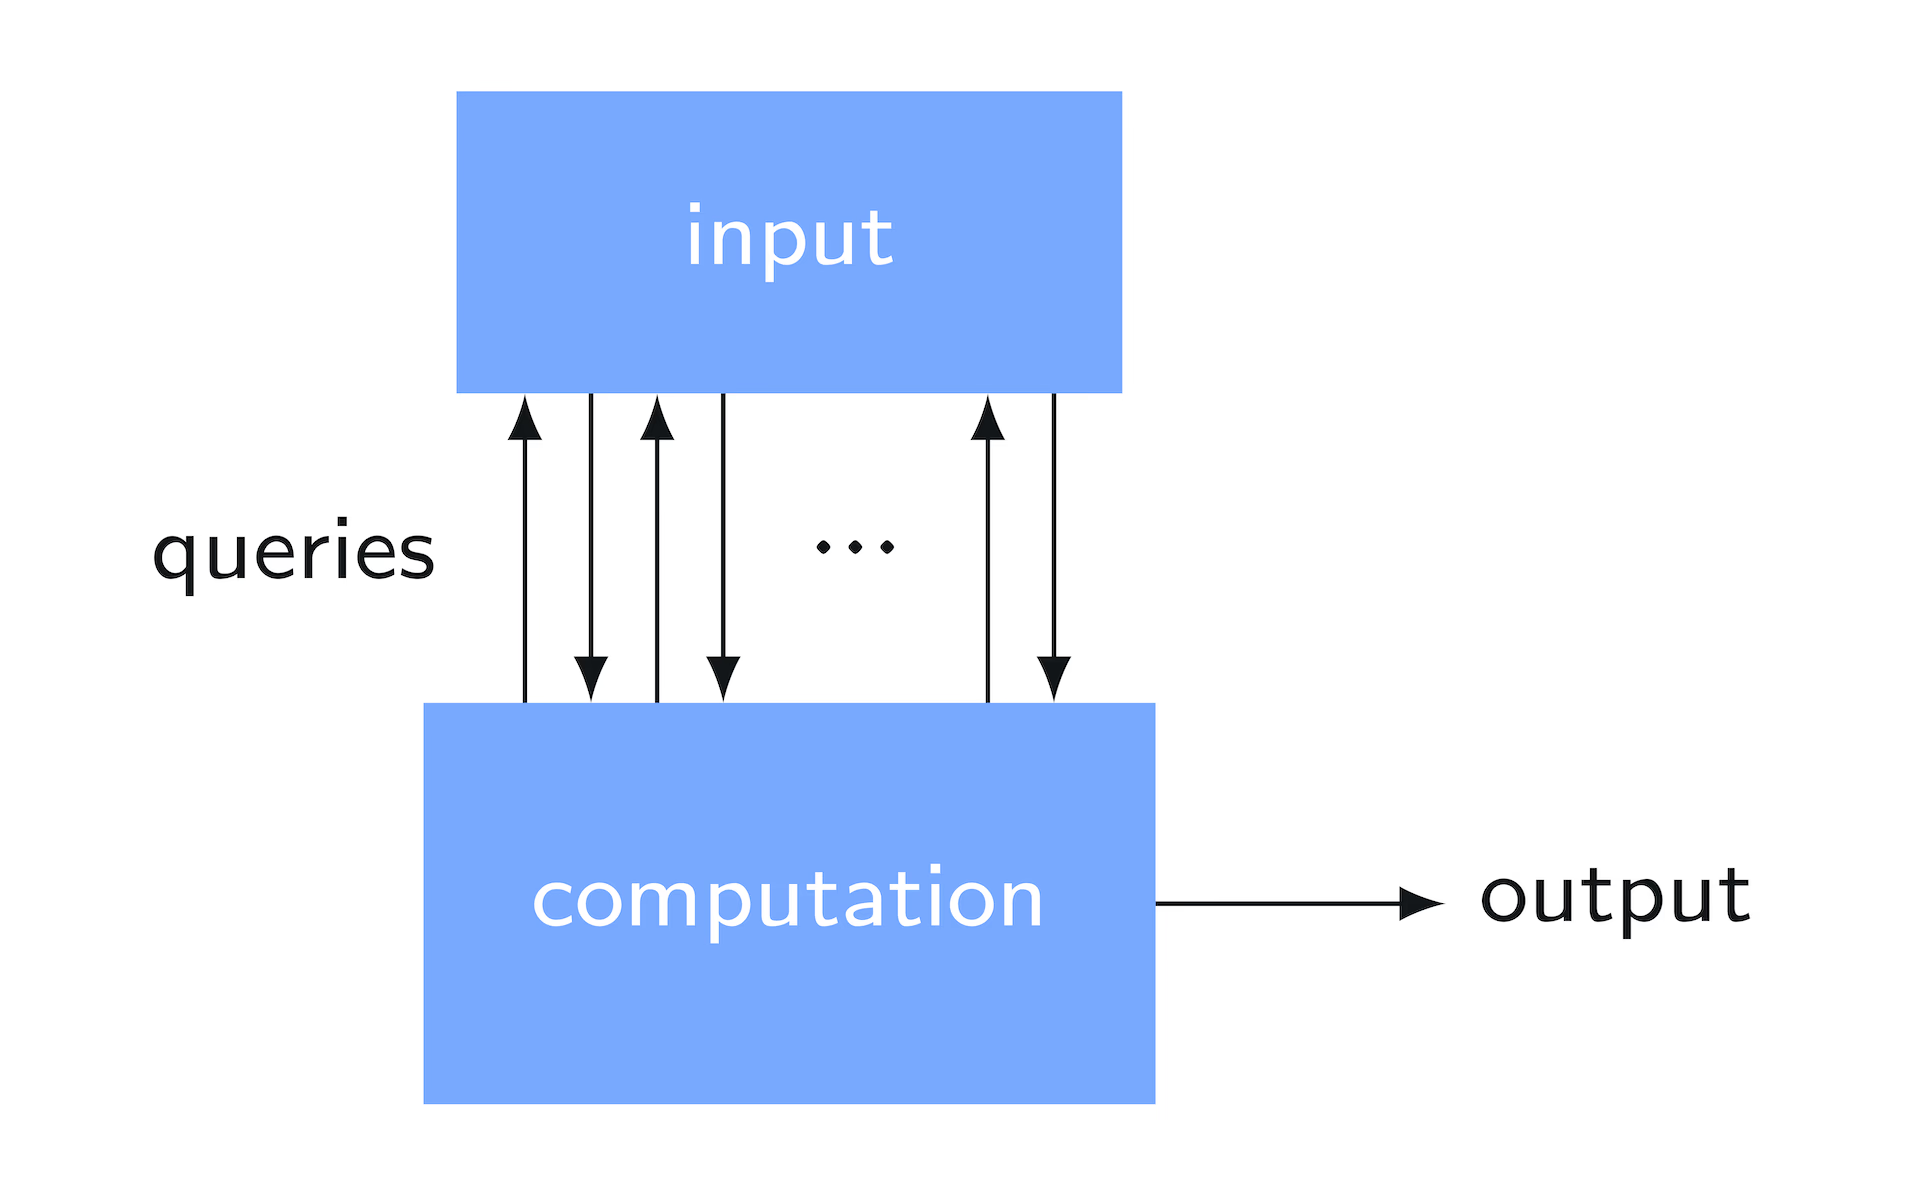

We say that the computation performs a **query**, if some string $x \in \{ 0,1 \}^n$ is selected, and the string $ f(x) \in \{ 0,1 \}^m $ becomes available for the next computation. Then, the number of queries corresponds simply to the number of times that we evaluated the function $f$, or in other words, the number of **oracle calls**.

Example: **OR function** outputs $1$ if there exists a string $y \in \{ 0,1 \}^n$ for which $f(x) = 1$, and outputs $0$ if such string does not exist.

$$f(x) = \bigg\{
\begin{aligned}
\ 0 \quad \text{if} \; y \neq x \\
\ 1 \quad \text{if} \; y = x \\
\end{aligned}$$


# Grover's Algorithm

Let us consider an **unstructured list** of $N=2^n$ elements ($n$ bits), for which there exists a set of elements with a property that we need: the **marked elements** $w$. We can assign each element of the list to a single bit string. Assume that we have an **oracle function** of $n$ bits $ f: \{ 0,1 \}^n \rightarrow \{ 0,1 \}$, which inputs $1$ only when the input string corresponds to (one of) the marked elements $w$, and $0$ otherwise. We are tasked to return the solution to the problem (**identify the marked elements**), and if there are no solutions, announce that there are no marked elements. This problem is known as the **unstructured search problem**, because just from the function alone, we cannot get information about the structure of the list.

Even if we have only one marked state, if we want to find the marked elements within the list using a classical computer, we need to check on average $N/2$ elements of the list and, in the worst case scenario, all $N$ elements. Therefore, we require $O(N)$ evaluations of the function $f$ to succeed with high probability.

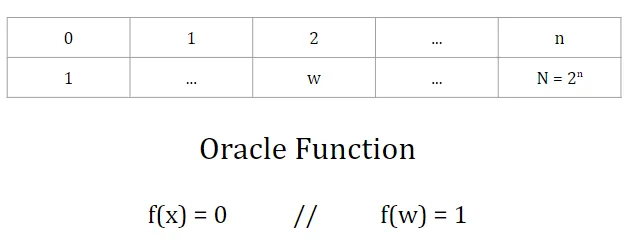

**Grover's algorithm** is a quantum algorithm for unstructured search problems that offers a quadratic improvement over classical algorithms. What this means is that Grover's algorithm requires a number of operations (oracle calls) on the order of the square-root of the number of operations required to solve unstructured search classically, that is, it takes $O(\sqrt N)$ steps. For large enough lists, this becomes a great improvement. For current technologies though, Grover's algorithm is not expected to lead to a practical quantum advantage for searching any time soon, but it is a fundamentally important quantum algorithm.

In a quantum computer, we can codify each element of the list as an element in the computational basis, similarly to how we encode a number into a bit string. Grover's algorithm solves problems where we consider a quantum oracle given by the unitary that adds a phase to the state associated with the solution $w$, that is, to the marked state.

$$
U_{\omega} | x \rangle=\left\{\begin{array} {r l} {{| x \rangle}} & {{\mathrm{i f ~} x \neq\omega}} \\ {{-| x \rangle}} & {{\mathrm{i f ~} x=\omega}} \\ \end{array} \right. 
$$

In terms of the oracle function, this is equivalent to:

$$U_\omega|x\rangle = (-1)^{f(x)}|x\rangle$$

where $U_\omega$ is a diagonal matrix

$$U_\omega = 
\begin{bmatrix}
(-1)^{f(0)} &   0         & \cdots &   0         \\
0           & (-1)^{f(1)} & \cdots &   0         \\
\vdots      &   0         & \ddots & \vdots      \\
0           &   0         & \cdots & (-1)^{f(2^n-1)} \\
\end{bmatrix}$$

## Amplitude Amplification

Before checking each element of the list, we have no information about the position of our marked element. Therefore, any element that we choose has the same probability as the rest to be the correct one. This can be expressed in terms of a uniform superposition, obtained by applying the Hadamard transform (i.e. Hadamard Gate to each qubit) onto the zero state:

$$| s \rangle = H^{\otimes n} | 0^n \rangle = \frac{1}{\sqrt N} \sum_{x=0}^{N-1} | x \rangle$$

Example: For $n=2$, we have $N=4$ and then:

$$| s \rangle = H \otimes H | 00 \rangle = \frac{1}{2} \sum_{x=0}^{3} | x \rangle = \frac{1}{2} \left( | 00 \rangle + | 01 \rangle + | 10 \rangle + | 11 \rangle\right)$$

If we measure in the computational basis ${| x \rangle}$, the superposition collapses to any element of the basis with the same probability $\frac{1}{N}$. In a quantum computer, we can use the process of **amplitude amplification**, in which we increase the amplitude of the marked element, whereas the amplitude of the other elements gets reduced (as the probabilities has to add to one). That way, we increase the probability to find the marked element $w$ upon measuring in the computational basis.

Let us consider the plane that has as axes the orthogonal vector $|w \rangle$ (which corresponds to the vector space spanned by the marked states) and $|s'\rangle$. Then, we can express the initial state as

$$|s\rangle = \sin \theta |w \rangle + \cos \theta |s' \rangle,$$

where $\theta = \arcsin \langle w | s' \rangle = \arcsin \frac{1}{\sqrt N}$, (considering for simplicity a single marked state).

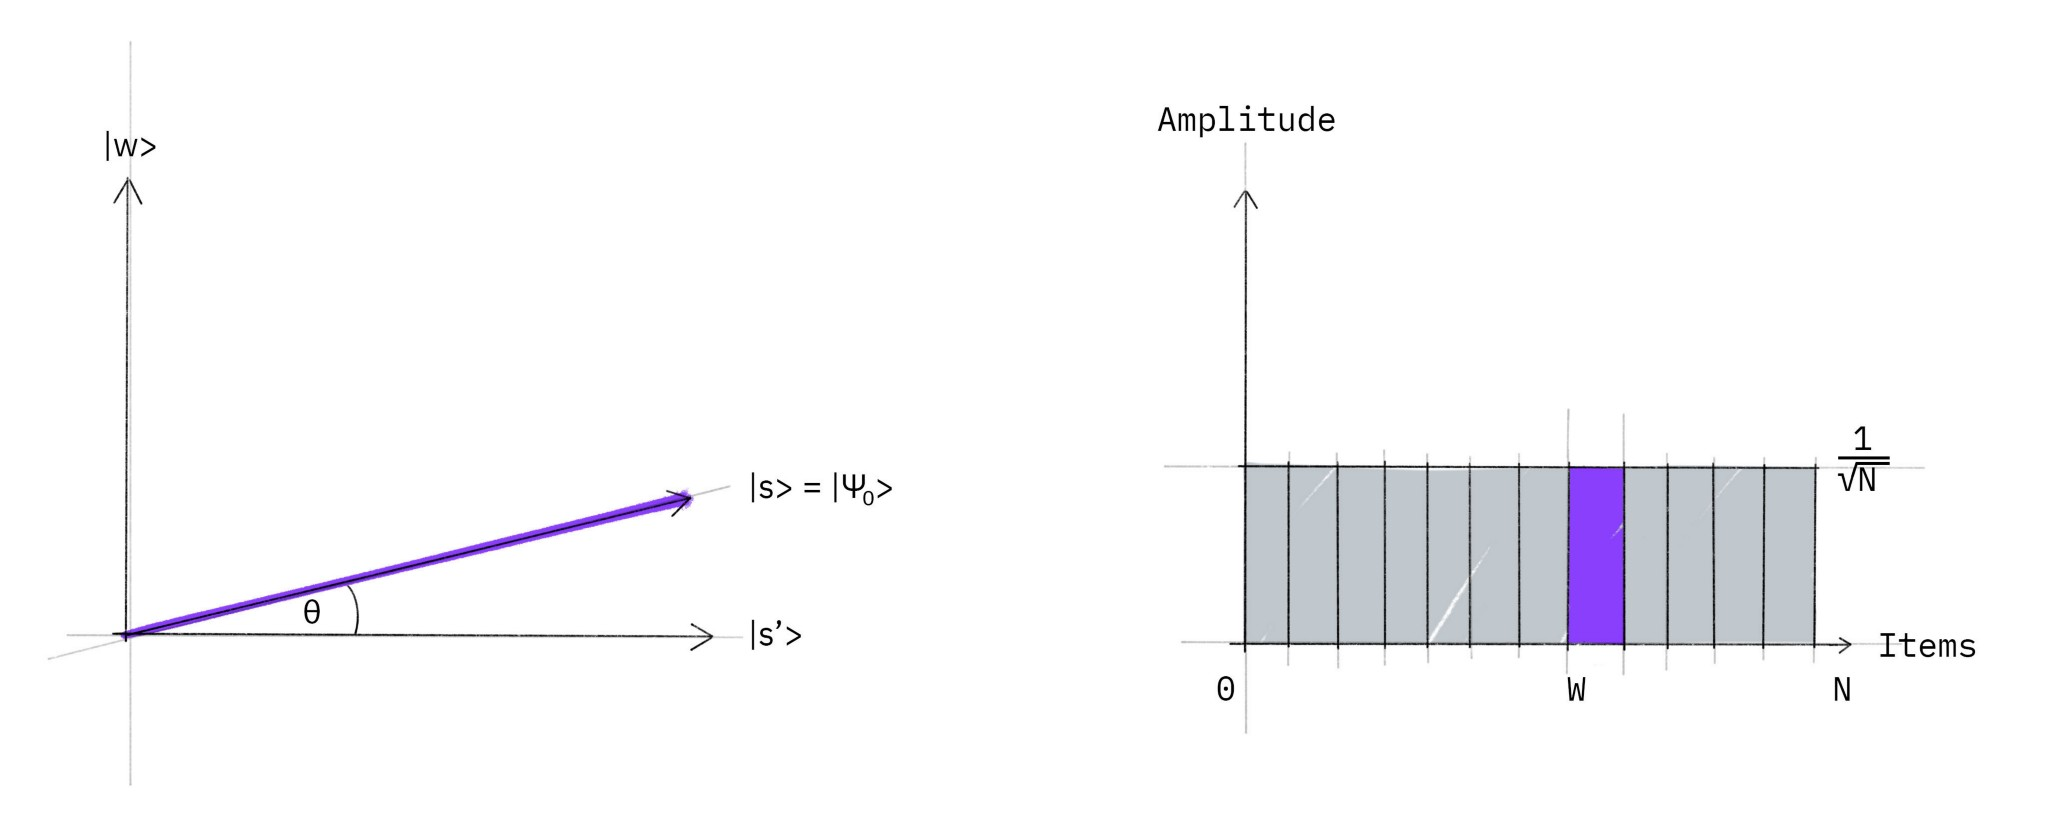

Then, we apply the oracle unitary to the state $|s\rangle$. Geometrically, this corresponds to a **reflection** of the state $|s\rangle$ across $|s'\rangle$, which makes that the amplitude of the state $|w\rangle$ becomes negative and the average amplitude gets lower (dotted line).

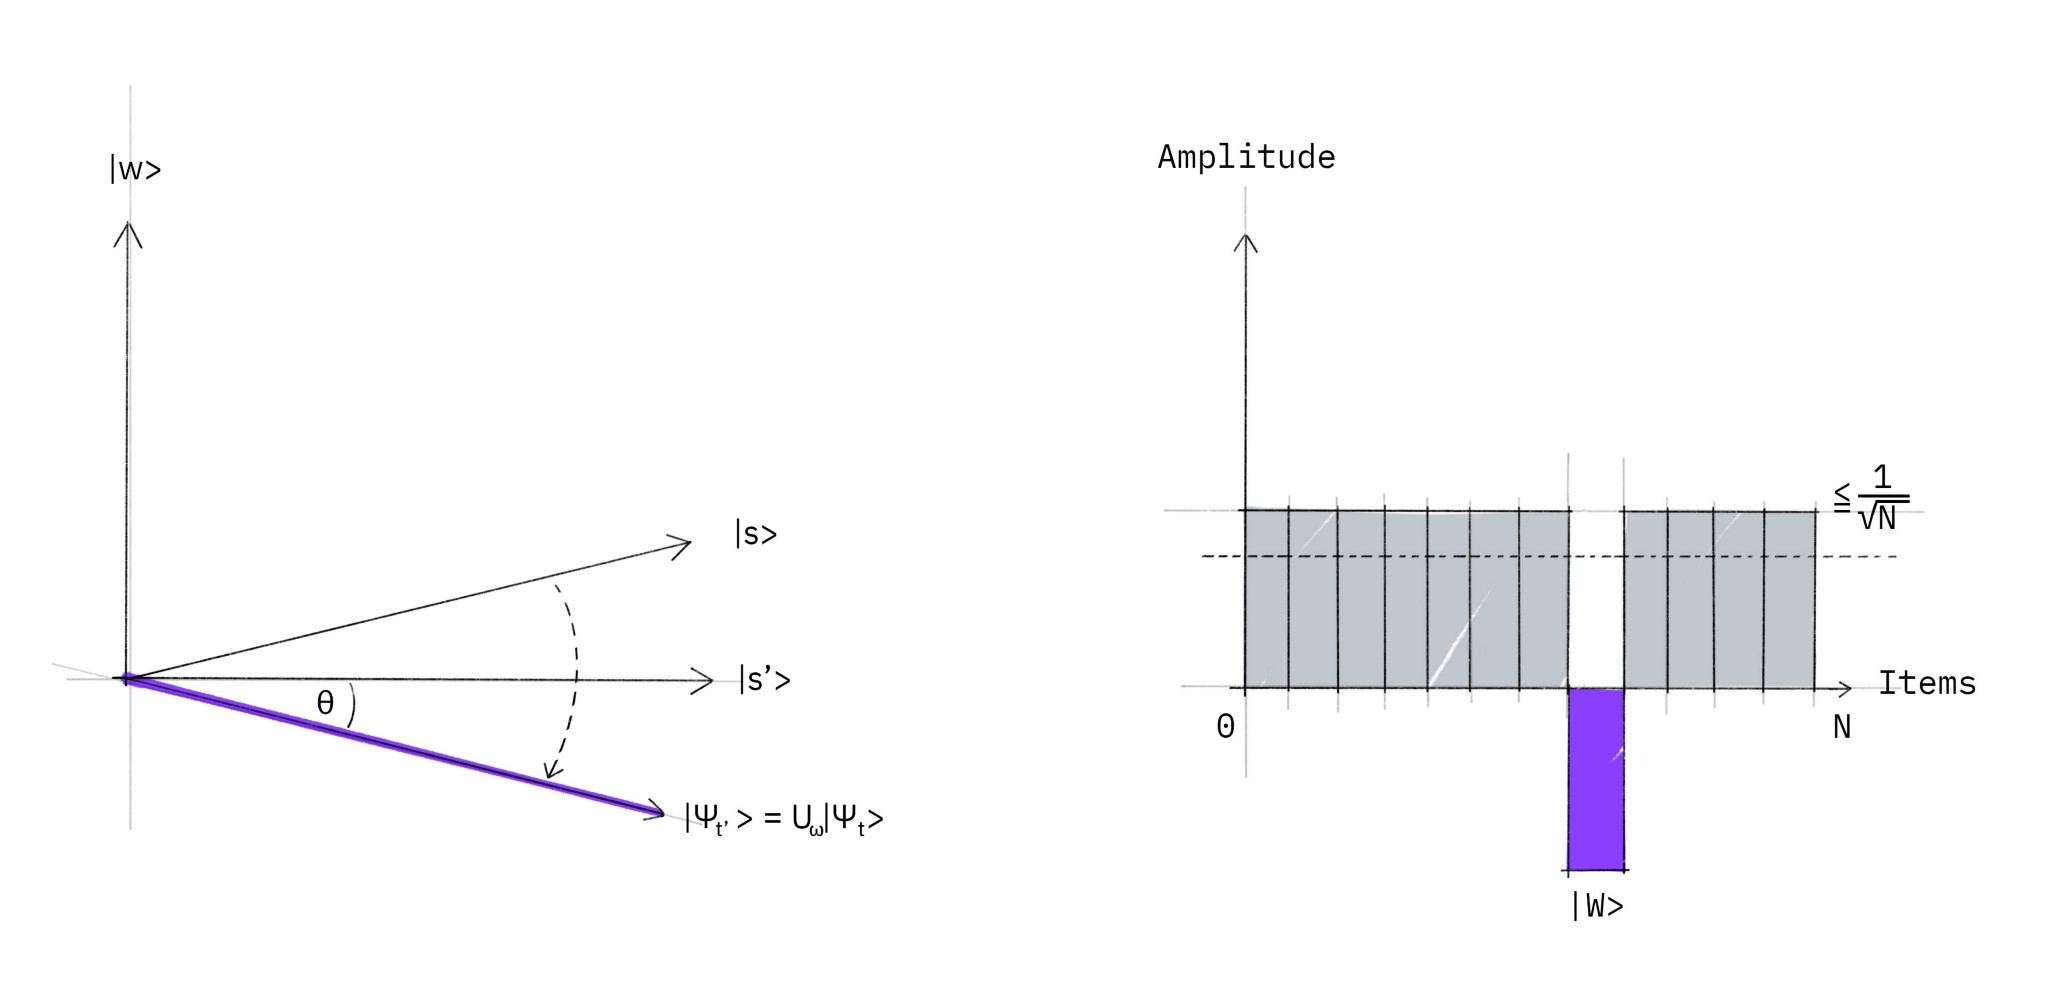

Next, we apply the **Diffuser operator**

$$U_s = 2 |s\rangle \langle s| - I = H^{\otimes n} \left(2 | 0^n \rangle \langle 0^n| - I \right)  H^{\otimes n},$$

which corresponds to a **reflection** across the original state $|s\rangle$. The amplitude of our marked state is now higher $|w\rangle$.

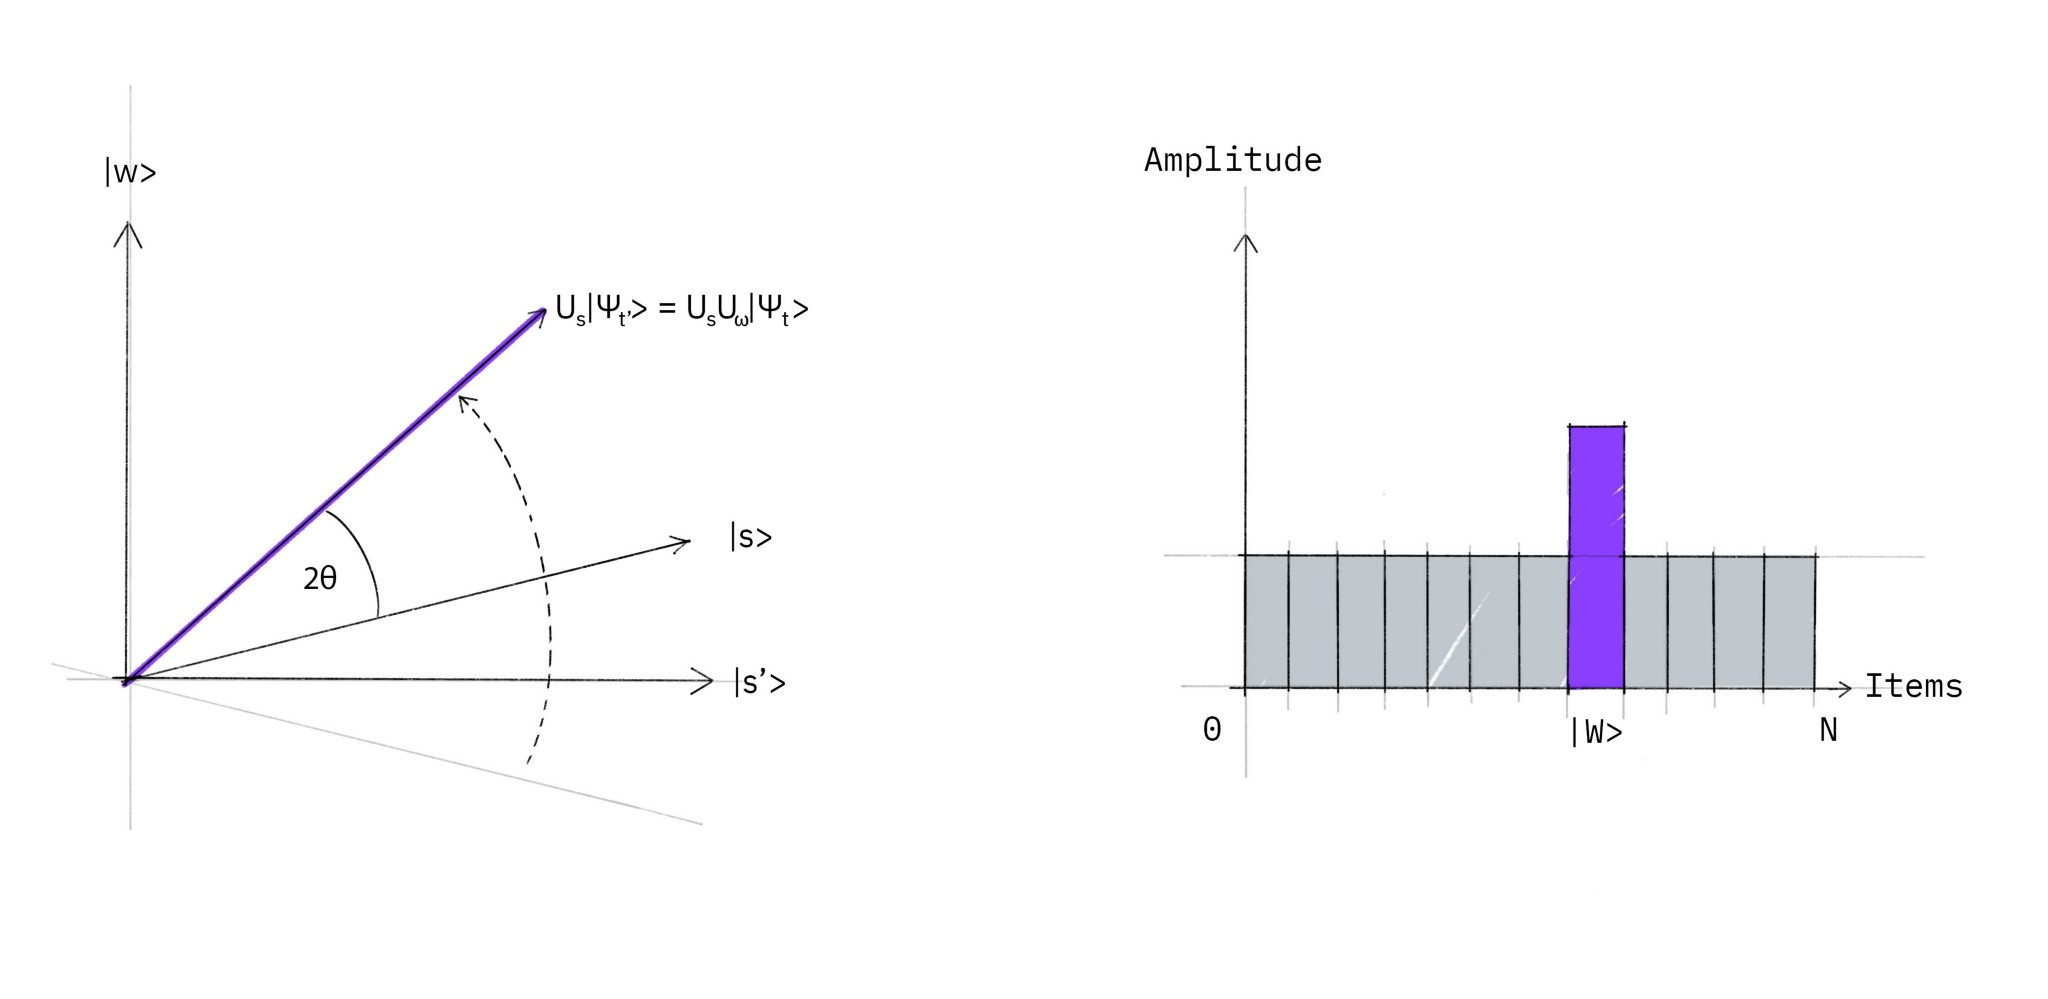

To implement the Diffuser, let us take a look into the action of the unitary operation $U_0 = 2 | 0^n \rangle \langle 0^n| - I$. This unitary can be written as the following phase query gate: 

$$
U_0 | x \rangle=\left\{\begin{array} {r l} {{| x \rangle}} & {{\mathrm{i f ~} x = 0^n}} \\ {{-| x \rangle}} & {{\mathrm{i f ~} x \neq 0^n}} \\ \end{array} \right. 
$$


To convince yourself that they are equivalent, lets consider the following example with the state $|\psi\rangle = |0\rangle \otimes |+\rangle \otimes |0\rangle = \frac{1}{\sqrt{2}}\left( |000\rangle + |010\rangle \right)$:

$$\begin{aligned}
U_0 |\psi\rangle &= \frac{1}{\sqrt{2}} \left( U_0 |000\rangle + U_0 |010\rangle \right) \\
&= \frac{1}{\sqrt{2}} \left( [2 | 000 \rangle \langle 000| - I] |000\rangle + [2 | 000 \rangle \langle 000| - I] |010\rangle \right) \\
&= \frac{1}{\sqrt{2}} \left( 2 \langle 000| 000 \rangle |000\rangle - |000\rangle + 2 \langle 000| 010 \rangle |000\rangle - |010\rangle \right) \\
&= \frac{1}{\sqrt{2}} \left( |000\rangle - |010\rangle \right)
\end{aligned}$$

In other words, this unitary operator $U_0$ adds relative phases to any element of the computational basis $| x \rangle \neq | 0^n \rangle$.

Let us construct now an operator defined as $\tilde{U} = -U_0$. To achieve this, we can use the multi-controlled $Z$ gate $MCZ$, which adds a negative phase only if the state is $|1^n\rangle$:

$$MCZ = 
\begin{bmatrix}
 1 & 0  & \cdots & 0 \\
 0 & 1  & \cdots & 0 \\
 \vdots & \vdots & \ddots & \vdots \\
 0 &  0 & \cdots & -1 \\
\end{bmatrix}
\begin{aligned}
\\
\\
\\
\leftarrow \text{Adds a negative phase to} \; |1^n\rangle\\
\end{aligned}$$

As we know, the $\tilde{U}$ operator adds a phase only to the state $|0^n \rangle$, so we must apply a series of $X$ gates at the start and at the end:

$$ |00\dots 0\rangle \rightarrow |11\dots 1\rangle \rightarrow - |11\dots 1\rangle \rightarrow |00\dots 0\rangle $$

obtaining the rotation $\tilde{U} = X^{\otimes n} (MCZ) X^{\otimes n}$. Then, the diffuser corresponds to 

$$U_s = H^{\otimes n} U_0 H^{\otimes n} = - H^{\otimes n} \tilde{U} H^{\otimes n} = - H^{\otimes n} X^{\otimes n} (MCZ) X^{\otimes n} H^{\otimes n}.$$

Notice that the $-1$ corresponds to a global phase, so it does not have any effects after measuring the final state.

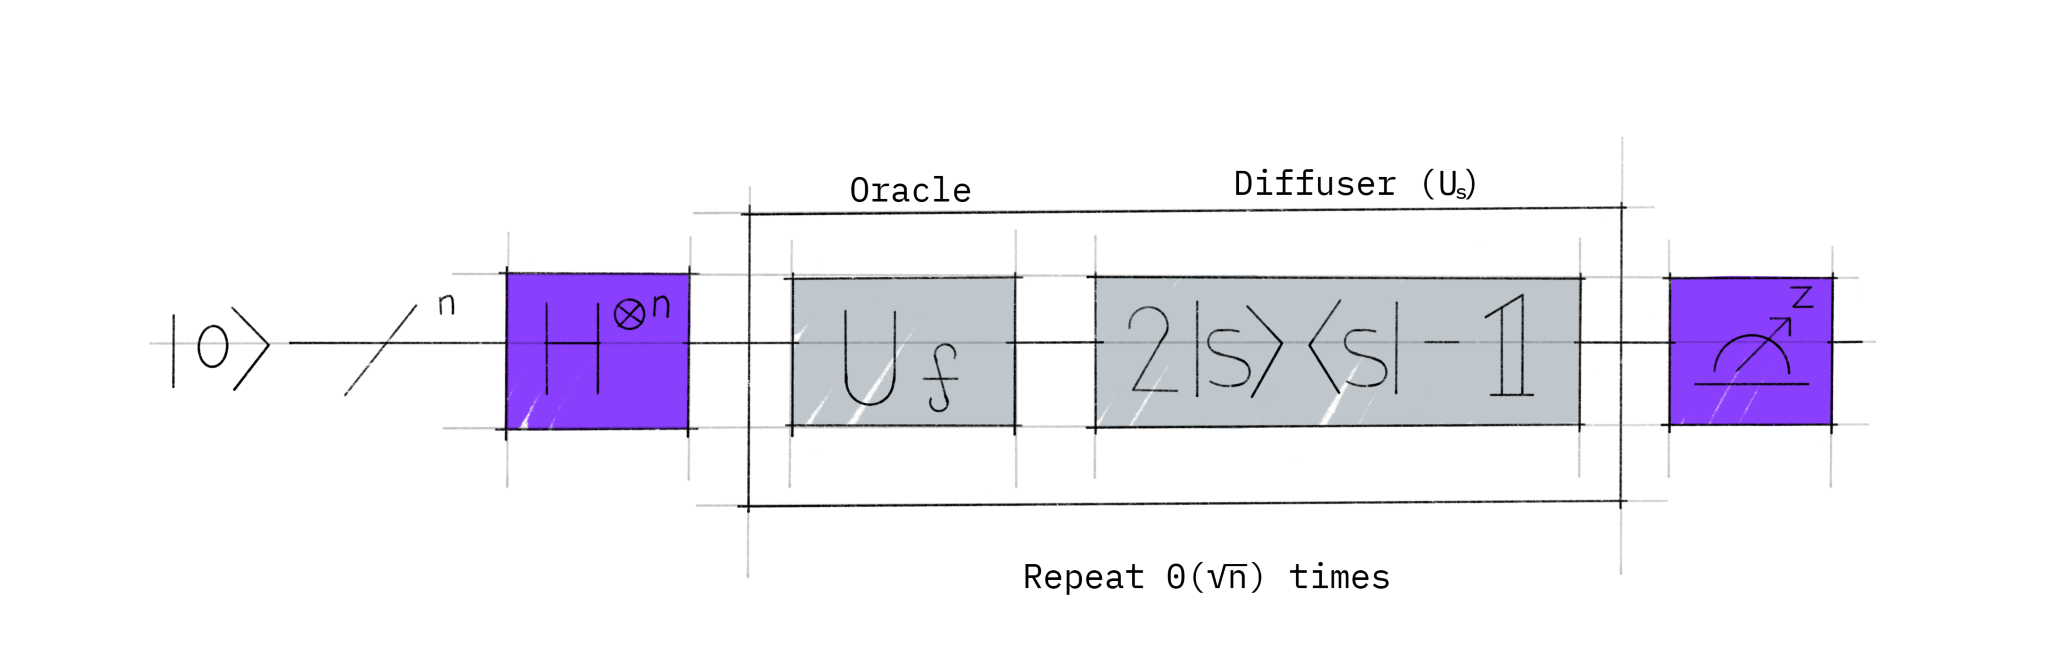

How many times do we have to apply the oracle and diffuser (also called **Grover operation**)? If we consider a list of $N$ elements with $M$ marked elements, it can be shown that the rotation angle $\theta$ produced by both operations is given by

$$ \theta = \arcsin \sqrt{\frac{M}{N}}, $$

and the number of times $t$ that we need to apply the Grover operation (when $M \ll N$) is given by

$$ t=\frac{\pi}{4 \theta} - \frac{1}{2} = \frac{\pi}{4 \arcsin \sqrt{\frac{M}{N}}} - \frac{1}{2} \approx O\left(\sqrt{ \frac{N}{M}}\right).$$ 

## 2 Qubits Example

Let us consider as marked state the state $|11\rangle$. In this case, the quantum oracle corresponds to the following unitary operator:

$$
|11\rangle = 
\begin{bmatrix}
0 \\
0 \\
0 \\
1 \\
\end{bmatrix},
\quad
U_\omega = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1 \\
\end{bmatrix},
$$

which can be easily be represented using the controlled $Z$ gate $CZ$.


**Preliminary Question (Slightly off-topic)**

When we presented the `CNOT` gate, we notice that the circuit representation specifies quite clearly which qubits correspond to the control and target qubits, respectively.

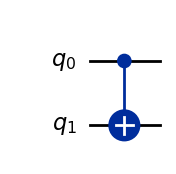

In [2]:
from qiskit.circuit import QuantumCircuit

qc_cx = QuantumCircuit(2)
qc_cx.cx(0,1)
qc_cx.draw('mpl')

On the other hand, when we draw the controlled $Z$ gate, we notice that it is represented using a "control" dot on both qubits. Why is that? Does it matter which qubit is the control or the target?

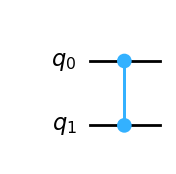

In [3]:
qc_cz = QuantumCircuit(2)
qc_cz.cz(1,0)
qc_cz.draw('mpl')

In [4]:
import numpy as np
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Number of qubits
n = 2

# Number of marked elements
M = 1

# Number of elements on the list
N = 2**n

# Angle of rotation
theta = np.arcsin((np.sqrt(M/N)))

# Number of repetitions
t = (np.pi/(4*theta) ) - 1/2
print(t)

0.9999999999999998


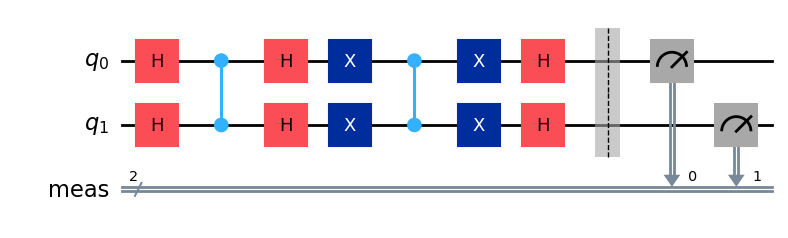

In [5]:
grover_circuit = QuantumCircuit(n)

# Hadamard Transform
grover_circuit.h(range(n))

# Quantum Oracle
grover_circuit.cz(0,1)

# Diffuser
grover_circuit.h([0,1])
grover_circuit.x([0,1])
grover_circuit.cz(0,1)
grover_circuit.x([0,1])
grover_circuit.h([0,1])
grover_circuit.measure_all()
grover_circuit.draw('mpl')

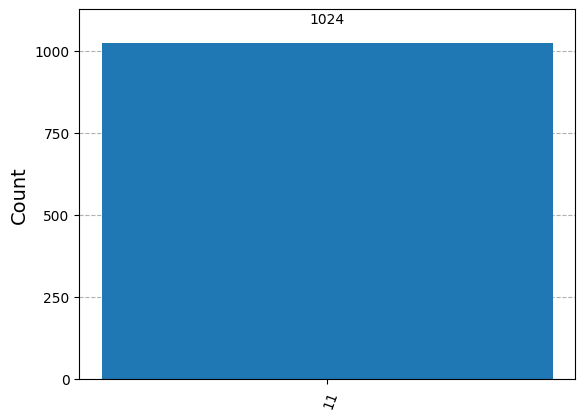

In [6]:
backend = AerSimulator()
pm = generate_preset_pass_manager(backend=backend)
grover_trans = pm.run(grover_circuit)
result = backend.run(grover_trans).result()
counts = result.get_counts()
plot_histogram(counts)

For a more general scenario, the $MCZ$ gate can be constructed using the `MCMTGate` function, which corresponds to a multi-controlled multi-target gate, for an arbitrary singly controlled target gate. In this case, we have $n-1$ control qubits, and only one target qubit, and the singly controlled target gate corresponds to the $Z$ gate, which we can export directly as `ZGate`.

In [7]:
from qiskit.circuit.library import MCMTGate, ZGate

def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)

    qc.h(range(nqubits))
    qc.x(range(nqubits))

    # MCMT gate: Gate, control qubits, target qubits
    qc.compose(MCMTGate(ZGate(), nqubits - 1, 1), inplace=True)

    qc.x(range(nqubits))
    qc.h(range(nqubits))

    # Transform the circuit into a Gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

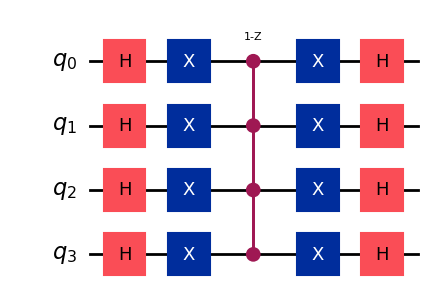

In [8]:
qc_dif = QuantumCircuit(4)
qc_dif.compose(diffuser(4), inplace=True)
qc_dif.decompose().draw('mpl')

## Noisy 3 Qubits Example

Next, we consider a 3 qubit example, with the marked states $|101\rangle$ and $|110\rangle$. The oracle that marks both states is given by the following circuit (check it!):

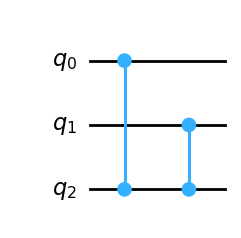

In [9]:
qc = QuantumCircuit(3)
qc.cz(0, 2)
qc.cz(1, 2)
oracle_ex3 = qc.to_gate()

qc.draw('mpl')

In [10]:
n = 3
M = 2
N = 2**n

theta2 = np.arcsin((np.sqrt(M/N)))
t = (np.pi/(4*theta2) ) - 1/2

print(t)

0.9999999999999998


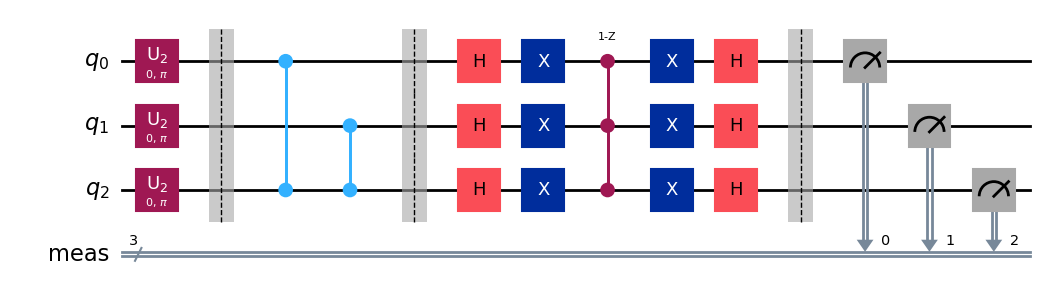

In [11]:
grover_circuit3 = QuantumCircuit(n)
grover_circuit3.h(range(n))
grover_circuit3.barrier()
grover_circuit3.compose(oracle_ex3, [0,1,2], inplace=True)
grover_circuit3.barrier()
grover_circuit3.compose(diffuser(n), [0,1,2], inplace=True)
grover_circuit3.measure_all()
grover_circuit3.decompose().draw('mpl')

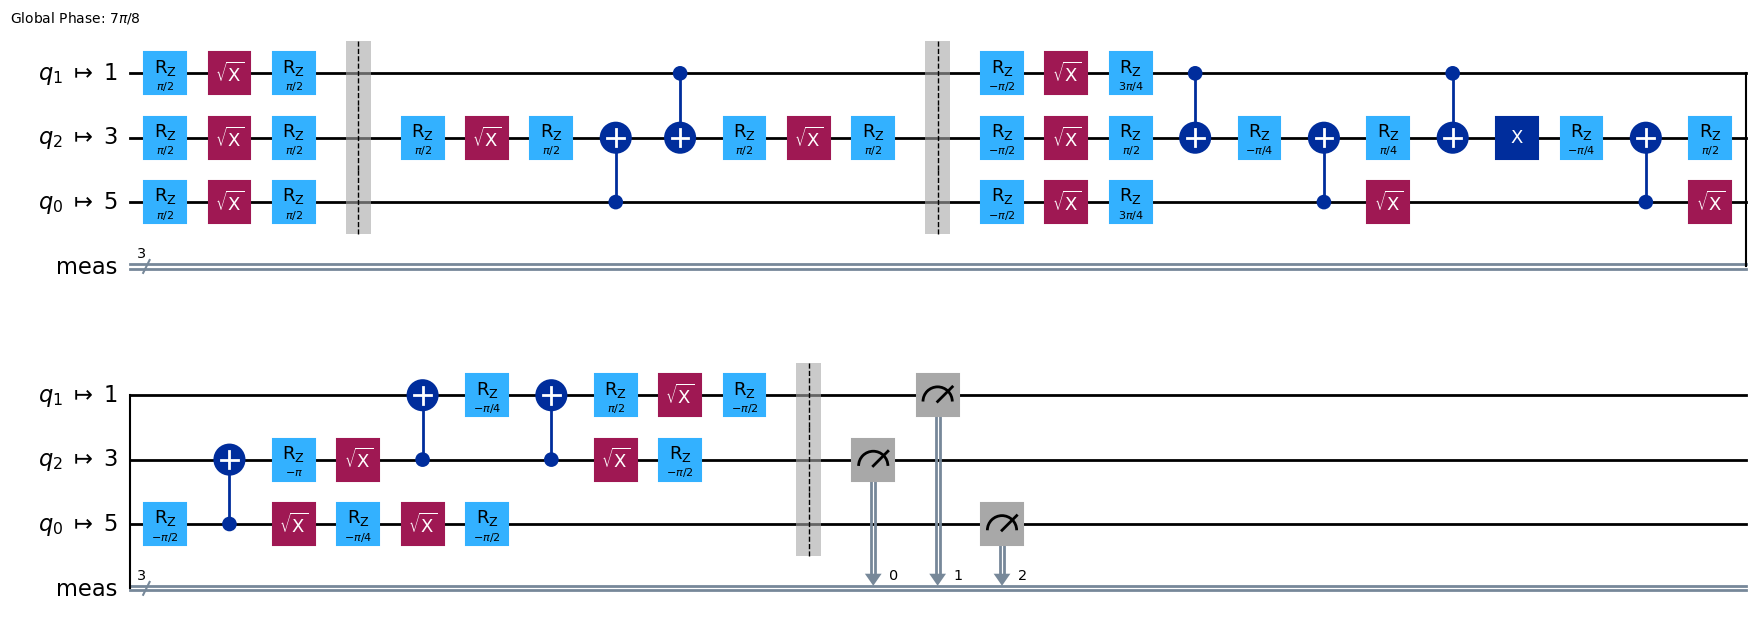

In [12]:
from qiskit_ibm_runtime.fake_provider import FakeCasablancaV2

device = FakeCasablancaV2()

pm_2 = generate_preset_pass_manager(backend=device)
grover_trans_2 = pm_2.run(grover_circuit3)
grover_trans_2.draw('mpl', idle_wires=False)

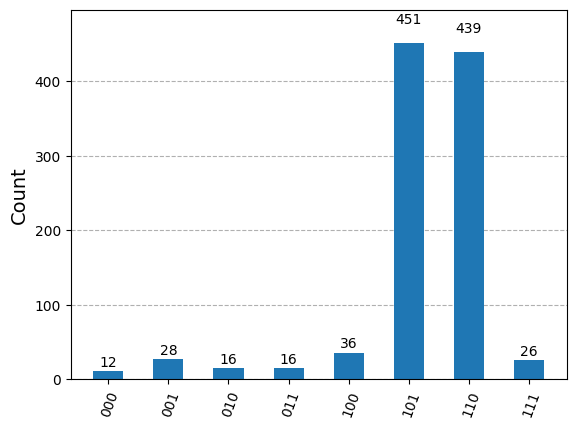

In [13]:
# swap backend with device for noisy simulation

result = device.run(grover_trans_2).result()
counts = result.get_counts()
plot_histogram(counts)

**Observation**: In the noiseless scenario, if we only consider one marked state, Grover's algorithm will always give us the correct answer using only exactly one shot (assuming that we perform the necessary amount of times the Grover operator). In case that we have multiple marked states, the final state before measurement will be a uniform superposition of all marked states. Therefore, we repeat the experiment until we recover the desire amount of marked states.

# Quantum Fourier Transform

The **Quantum Fourier Transform** (QFT) is the quantum analog of the discrete Fourier transform, which is used to analyze periodic functions by mapping between time and frequency representations. The QFT is one of the most important building blocks in quantum algorithms, famously used in quantum phase estimation and Shor’s factoring algorithm.

Lets consider an input data vector $(x_0, \ldots, x_{N-1})$ of dimension $N$. The **discrete Fourier transform** (DFT) outputs a vector of the same size $(y_0, \ldots, y_{N-1})$, where

$$ y_{k}=\sum_{j=0}^{N-1} x_{j} \exp \biggl(-\frac{2 \pi i k j} {N} \biggr). $$

Let us consider $N=2^n$, where $n$ is the number of bits. The DFT operation can be implemented in a classical computer with $O(4^n)$ operations (complex summations and multiplications). The faster known algorithm that implements the DFT is called the **Faster Fourier Transform** (FFT), which implements it with $O(n 2^n)$ operations. On the other hand, the QFT can be implemented in a quantum computer using $O(n^2)$ operations (Hadamard gates and controlled phase gates), which is exponentially faster than its classical counterpart.

Before starting, remember that we can write an integer number $x$ in **binary notation** as follows:

$$x = 2^{0}x_n + 2^{1}x_{n-1} + \ldots + 2^{n-1} x_{1} = \sum_{k=1}^{n} \frac{2^{n}}{2^{k}} x_k$$

For example, the number $x=11$ in binary notation with $n=4$ is:

$$11 = 2^{0} \cdot 1 + 2^{1} \cdot 1 + 2^{2} \cdot 0 + 2^{3} \cdot 1 = 1 + 2 + 0 + 8 \quad \longrightarrow \quad |11 \rangle = |1011 \rangle$$

Intuivativelly, the QFT transform states between two basis: the computational basis ($Z$ basis) and the Fourier basis. The simplest example is the single qubit QFT, which is equivalent to the Hadamard gate, transforming states from the the $Z$ basis $|0\rangle, |1\rangle$ to the diagonal basis ($X$ basis) $|+\rangle, |-\rangle$ and vice versa. 

If we have a state of dimension $N=2^n$, where $n$ is the number of bits, the QFT acts as follows:

\begin{aligned}
QFT_{n}\vert x \rangle & = \frac{1}{\sqrt{2^n}} \sum_{y=0}^{2^n-1} \exp{\biggl(\frac{2 \pi i xy}{2^n}\biggr)}  \vert y \rangle, \quad \text{rewrite in binary notation}\: \vert y \rangle = \vert y_1 \ldots y_n \rangle, \quad \frac{y}{2^n} = \sum_{k=1}^n \frac{y_k}{2^k}, \quad \sum_{y=0}^{2^n-1} = \sum_{y_1=0}^{1}\sum_{y_2=0}^{1}\ldots\sum_{y_n=0}^{1} 
\\
& = \frac{1}{\sqrt{2^n}} \sum_{y_1=0}^{1}\sum_{y_2=0}^{1}\ldots\sum_{y_n=0}^{1}  \exp{ \biggl( \sum_{k=1}^n 2 \pi i x \frac{y_k}{2^k} \biggr)} \vert y_1 \ldots y_n \rangle, \quad \text{rewrite the exponential in the sum as a product of exponential}  
\\
& = \frac{1}{\sqrt{2^n}} \sum_{y_1=0}^{1}\sum_{y_2=0}^{1}\ldots\sum_{y_n=0}^{1}  \prod_{k=1}^n \exp{\biggl(2 \pi i x \frac{y_k}{2^k} \biggr)} \vert y_1 \ldots y_n \rangle, \quad \text{after reordering the sum and products} 
\\
& = \frac{1}{\sqrt{2^n}} \bigotimes_{k=1}^n  \left[\vert0\rangle + \exp{\biggl( \frac{2 \pi i}{2^k} x \biggr)} \vert1\rangle \right],
\\
& = \frac{1}{\sqrt{2^n}}
\left[\vert0\rangle + \exp{\biggl(\frac{2\pi i}{2}x\biggr)} \vert1\rangle\right] 
\otimes
\left[\vert0\rangle + \exp{\biggl(\frac{2\pi i}{2^2}x\biggr)} \vert1\rangle\right] 
\otimes  
\ldots
\otimes
\left[\vert0\rangle + \exp{\biggl(\frac{2\pi i}{2^{n-1}}x\biggr)} \vert1\rangle\right]
\otimes
\left[\vert0\rangle + \exp{\biggl(\frac{2\pi i}{2^n}x\biggr)} \vert1\rangle\right]
\end{aligned}

To implement the QFT in Qiskit we use 3 quantum gates:

*  The Hadamard gate, which acts onto the computational basis as follows:

$$H\vert x_k \rangle = \frac{1}{\sqrt{2}}\left[\vert0\rangle + \exp\left(\frac{2\pi i}{2} x_k\right)\vert1\rangle\right]$$

*  A two-qubits controlled rotation given by:

$$CROT_k = \left(\begin{matrix}
I&0\\
0&UROT_k\\
\end{matrix}\right), \quad 
UROT_k = \left(\begin{matrix}
1&0\\
0&\exp\frac{2\pi i}{2^k}\\
\end{matrix}\right)$$

The effect of this gate over the computational basis is as follows:

$$CROT_k\vert 0x_j\rangle = \vert 0x_j\rangle, \quad CROT_k\vert 1x_j\rangle = \exp\left( \frac{2\pi i}{2^k} x_j \right)\vert 1x_j\rangle$$

*  The SWAP gate, which exchanges the state of two qubits.

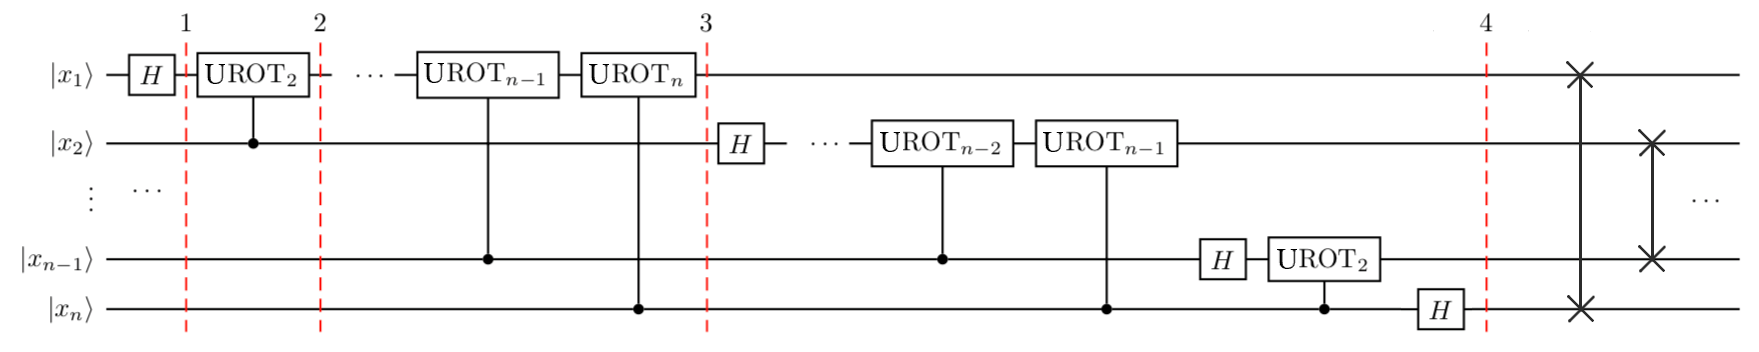

Let us show that the circuit shown in the previous image does indeed implement the QFT correctly. We start with the $n$ qubits input in the state $\vert x_1x_2\ldots x_n\rangle$.


1. After applying the Hadamard gate into the first qubit, our state becomes

$$H_1\vert x_1x_2\ldots x_n\rangle = 
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + \exp\left(\frac{2\pi i}{2}x_1\right)\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle$$

2. After applying the $UROT_2$ rotation over the qubit $1$ controlled by the qubit $2$, we get

$$\frac{1}{\sqrt{2}}
\left[\vert0\rangle + \exp\left(\frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1\right)\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle$$

3. After applying the last $UROT_n$ rotation over the qubit $1$ controlled by the qubit $n$, the state becomes

$$\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^n}x_n + 
\frac{2\pi i}{2^{n-1}}x_{n-1} + 
\ldots + 
\frac{2\pi i}{2^2}x_2 + 
\frac{2\pi i}{2}x_1
\right)
\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle$$

Rewriting in binary notation, we have

$$\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^n}x 
\right)
\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle$$

4. After applying this sequence of gates for the next $2 \ldots n$ qubits, we arrive to the final state

$$\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^n}x 
\right)
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^{n-1}}x 
\right)
\vert1\rangle\right]
\otimes
\ldots
\otimes
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^{2}}x 
\right)
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2}x 
\right)
\vert1\rangle\right]$$

5.  Notice that the order of the output qubits is inverted in comparison to the QFT, therefore we add a series of $SWAP$ gates.

Coming back to the number of gates required, notice that the first step requires one Hadamard gate and $(n-1)$ controlled phase gates, the next requires one Hadamard and $(n-2)$ controlled phase gates, and so on. Summing the number of gates (without considering the $SWAP$ gates), we have

$$n + (n-1) + (n-2) + \ldots + 1 = \frac{n (n+1)}{2} = O(n^2).$$

To implement this circuit in Qiskit, we use the controlled-phase gate, which is given by:
$$CP(\theta) =
\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{i\theta}\end{bmatrix}$$

We will implement the QFT circuit step by step, first building a function that performs the rotations:

In [15]:
def qft_rotations_a(n):
    circuit = QuantumCircuit(n)
    circuit.h(n-1)
    if n == 0:
        return circuit

    else: 
        for i in range(n-1):
            circuit.cp(np.pi/2**(i+1), n-1, n-2-i)
        return circuit

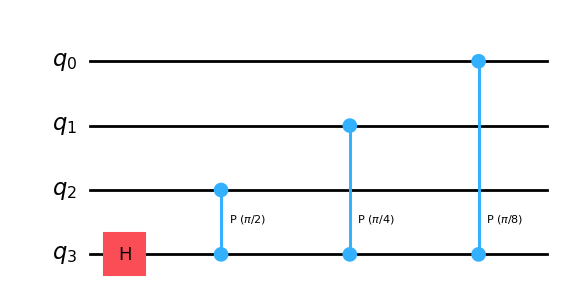

In [16]:
qc = qft_rotations_a(4)
qc.draw('mpl')

We can reuse the previous function to implement the loop cycle for every all necessary rotations.

In [17]:
def qft_rotations(n):
    circuit = QuantumCircuit(n)
    for i in range(n, 0, -1):
        circuit.compose(qft_rotations_a(i), range(i), inplace=True)
        circuit.barrier()
    
    return circuit

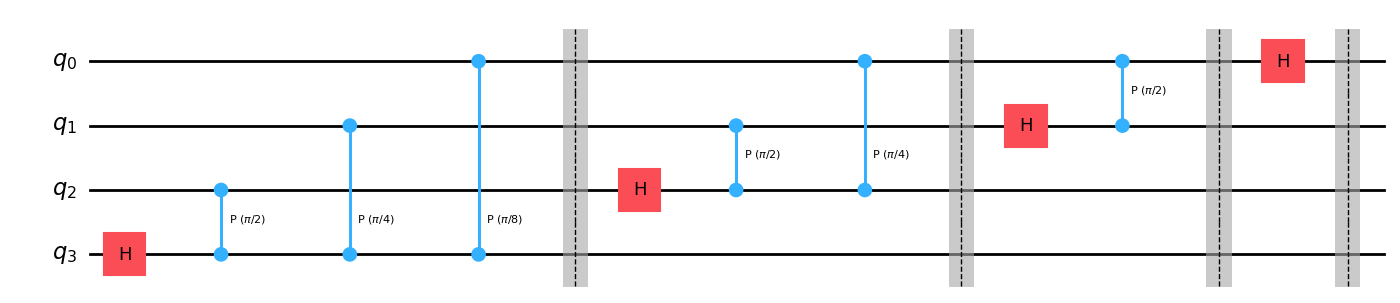

In [18]:
qc = qft_rotations(4)
qc.draw('mpl')

Lastly, we implement the $SWAP$ gates to return the correct qubit order.

In [19]:
def qft(n):
    circuit = qft_rotations(n)
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

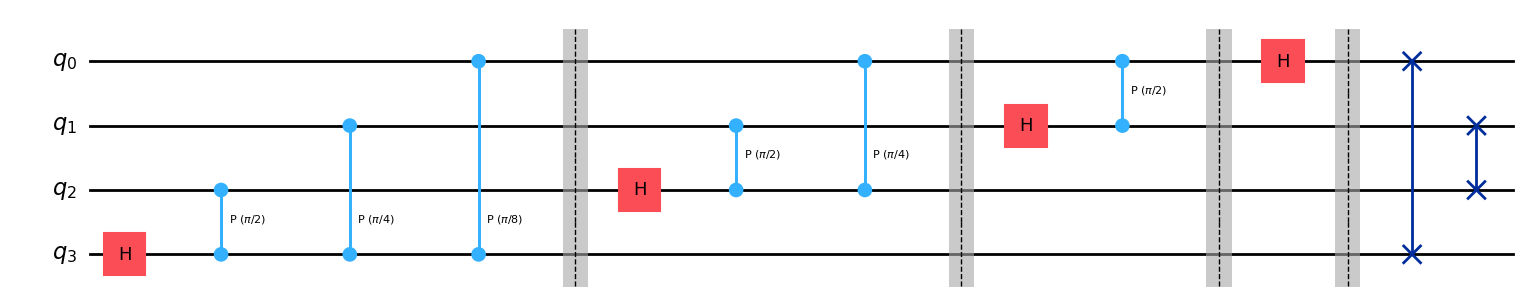

In [20]:
qc = qft(4)
qc.draw('mpl')

We can obtain the QFT circuit directly using the QFT class from Qiskit, which also includes the option of getting the inverse QFT.

In [21]:
from qiskit.circuit.library import QFT 

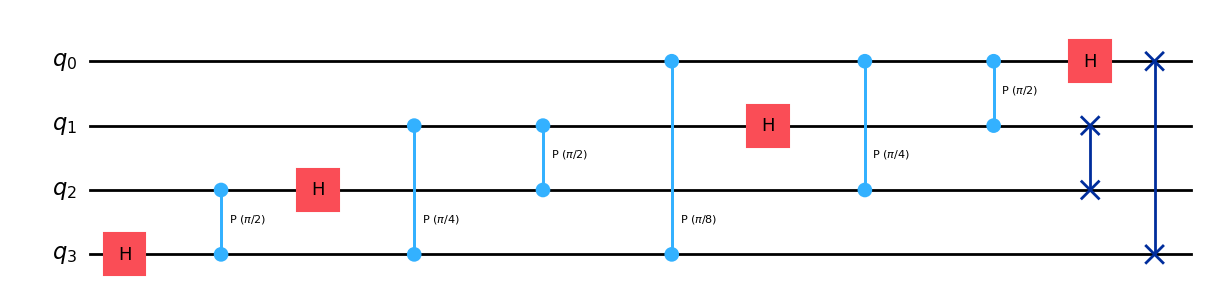

In [22]:
num_qubits = 4

qc = QFT(num_qubits)
qc.decompose().draw('mpl')

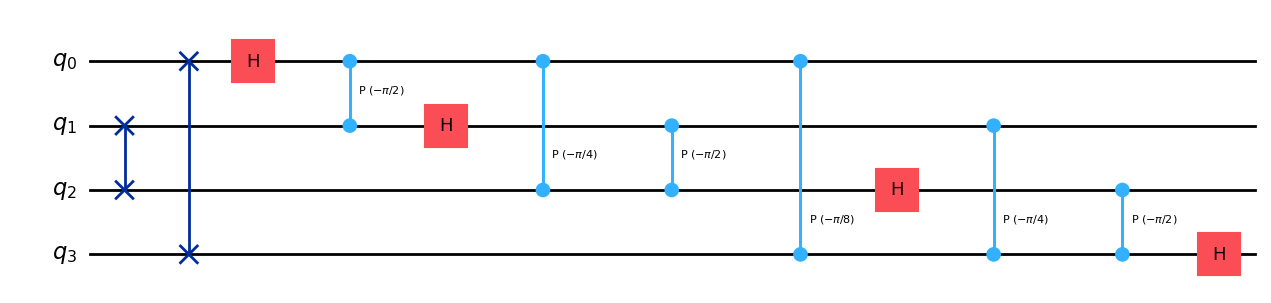

In [23]:
qc_inverse = QFT(num_qubits, inverse=True)
qc_inverse.decompose().draw('mpl')

Lets visualize the effect of the QFT over the state $|101\rangle$, which corresponds in binary representation to the number $5$.

In [ ]:
qc = QuantumCircuit(3)

qc.x(0)
qc.x(2)
qc.draw('mpl')

In [ ]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

statevector = Statevector(qc)
plot_bloch_multivector(statevector)

In [ ]:
qc_qft = qc.compose(qft(3), range(3), inplace=False)
qc_qft.draw('mpl')

For comparison, lets also check the Bloch sphere representation of the zero state in the Fourier basis $|\tilde{0}\rangle = |+ \rangle^{\otimes 3}$.

In [ ]:
qc = QuantumCircuit(3)

qc.h(0)
qc.h(1)
qc.h(2)

statevector_0 = Statevector(qc)
plot_bloch_multivector(statevector_0)

In [ ]:
# Fourier Transform of state 101

statevector_qft = Statevector(qc_qft)
plot_bloch_multivector(statevector_qft)

Comparing both states, we notice that the first qubit gets rotated by an angle of $\tfrac{5}{2^n} = \tfrac{5}{8}$. Similarly, the second qubit gets rotated twice this amount, $\tfrac{5}{2^{n-1}} = \tfrac{5}{4}$, which is equivalent to a quarter of a full rotation. Finally, the third qubit gets rotated twice the previous amount, $\tfrac{5}{2^{n-2}}= \tfrac{5}{2}$, which corresponds to a half-rotation.